<a href="https://colab.research.google.com/github/likhon15-4915/Algorithm_Lab/blob/main/Infection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
IMAGE_SIZE = 256
BATCH_SIZE = 79
CHANNELS = 3

In [ ]:
from google.colab import drive
drive.mount('/content/mount')

Mounted at /content/mount


In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/mount/MyDrive/TDtestingSkinD/skinDnew",
    seed=123,
    shuffle=True,
  image_size =(IMAGE_SIZE,IMAGE_SIZE),
    batch_size =BATCH_SIZE
)

Found 1135 files belonging to 4 classes.


In [ ]:
class_names =dataset.class_names
class_names

['BA', 'FU', 'PA', 'VI']

In [ ]:
len(dataset)

15

In [ ]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(79, 256, 256, 3)
[3 3 0 3 3 1 1 1 0 3 1 1 1 3 2 0 1 1 1 3 3 2 1 0 1 2 0 1 1 0 0 1 1 3 1 1 0
 1 3 1 2 3 0 3 1 2 1 0 3 3 0 1 3 1 3 1 0 1 3 0 1 0 0 3 0 3 1 1 2 3 1 1 3 3
 3 1 1 0 1]


In [ ]:
len(dataset)

15

In [ ]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(79, 256, 256, 3)
[3 0 1 3 3 0 1 3 1 0 0 1 0 1 3 1 1 1 1 1 1 1 0 1 2 3 3 1 0 1 1 3 1 3 3 1 0
 1 1 0 1 0 3 3 3 2 3 1 1 3 1 3 2 3 0 0 1 0 0 3 1 1 0 3 0 3 2 2 3 3 2 1 0 2
 3 3 1 0 0]


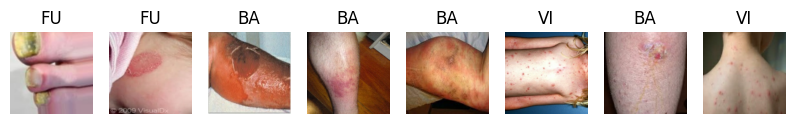

In [ ]:
plt.figure(figsize=(10,10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(8):
        ax = plt.subplot(1, 8, i+1)#(6,4,i+1)

        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [ ]:
def get_dataset(ds ,train_split=0.8,val_split=0.1 , test_split=0.1,shuffle=True, shuffle_size =1000):
  assert(train_split+val_split+test_split)==1
  ds_size = len(ds)
  if shuffle:
    ds = ds.shuffle(shuffle_size,seed=12)

  train_size = int(train_split*ds_size)
  val_size = int (val_split*ds_size)

  train_ds = ds.take(train_size)
  val_ds = ds.skip(train_size).take(val_size)
  test_ds = ds.skip(train_size).skip(val_size)

  return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset(dataset)

In [ ]:
len(train_ds)

12

In [ ]:
len(val_ds)

1

In [ ]:
len(test_ds)

2

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size =tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size =tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size =tf.data.AUTOTUNE)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

IMAGE_SIZE = 224  # or any size you need

resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1./255)
])


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])


In [ ]:

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [ ]:
train_ds = train_ds.map(
    lambda x,y: (data_augmentation(x,training=True),y)
).prefetch(buffer_size = tf.data.AUTOTUNE)

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes =4

model = models.Sequential([
resize_and_rescale,
layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, (3, 3), activation='relu'),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64,(3, 3), activation='relu'),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, (3, 3), activation='relu'),
layers.MaxPooling2D((2, 2)),
layers.Flatten(),
layers.Dense (64, activation='relu'),
layers.Dense (n_classes, activation='softmax'),

])

model.build(input_shape = input_shape)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (79, 224, 224, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (79, 222, 222, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (79, 111, 111, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (79, 109, 109, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (79, 54, 54, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (79, 52, 52, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (79, 26, 26, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (79, 24, 24, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (79, 12, 12, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (79, 10, 10, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (79, 5, 5, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (79, 3, 3, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (79, 1, 1, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (79, 64)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (79, 64)               │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (79, 4)                │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 171,524 (670.02 KB)

 Trainable params: 171,524 (670.02 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    batch_size =BATCH_SIZE,
    validation_data = val_ds,
    epochs=10
)

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 122s 10s/step - accuracy: 0.9342 - loss: 0.1980 - val_accuracy: 0.9494 - val_loss: 0.1431
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 124s 11s/step - accuracy: 0.9305 - loss: 0.2110 - val_accuracy: 0.9241 - val_loss: 0.2037
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 127s 10s/step - accuracy: 0.9385 - loss: 0.1680 - val_accuracy: 0.9620 - val_loss: 0.1877
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 125s 10s/step - accuracy: 0.9450 - loss: 0.2139 - val_accuracy: 0.9494 - val_loss: 0.1546
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 123s 10s/step - accuracy: 0.9348 - loss: 0.2004 - val_accuracy: 0.9241 - val_loss: 0.1447
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 143s 10s/step - accuracy: 0.9307 - loss: 0.1788 - val_accuracy: 0.9241 - val_loss: 0.1836
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 122s 10s/step - accuracy: 0.9470 - loss: 0.1478 - val_accuracy: 0.9620 - val_loss: 0.1000
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 124s 11s/step - accuracy: 0.9505 - loss: 0.1447 - val_accuracy: 0.

In [ ]:
scores = model.evaluate(test_ds)

2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.9451 - loss: 0.3279


In [ ]:
scores

[0.34864604473114014, 0.9430379867553711]

In [ ]:
history

In [ ]:
history.params

{'verbose': 'auto', 'epochs': 10, 'steps': 12}

In [ ]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [ ]:
len(history.history['loss'])

10

In [ ]:
history.history['loss'][:5]

[0.1943919062614441,
 0.22106707096099854,
 0.15306128561496735,
 0.19001296162605286,
 0.1917065531015396]

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss =history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
# Concatenate labels for training dataset
train_labels = np.concatenate([y.numpy() for x, y in train_ds], axis=0)
print(f"Training labels shape: {train_labels.shape}")

# Concatenate labels for validation dataset
val_labels = np.concatenate([y.numpy() for x, y in val_ds], axis=0)
print(f"Validation labels shape: {val_labels.shape}")

Training labels shape: (898,)
Validation labels shape: (79,)


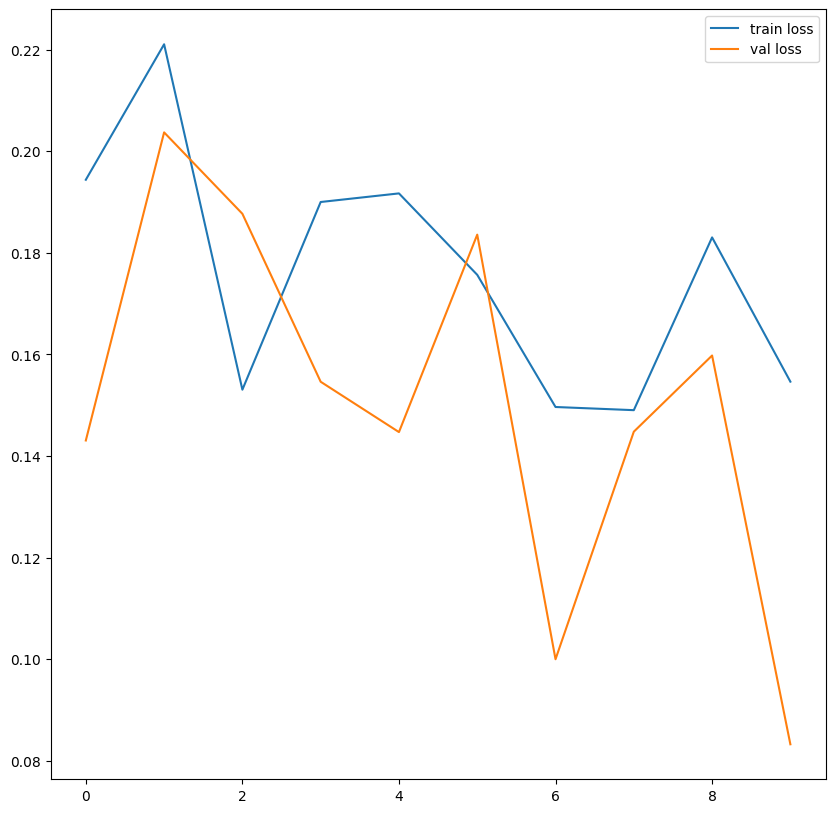

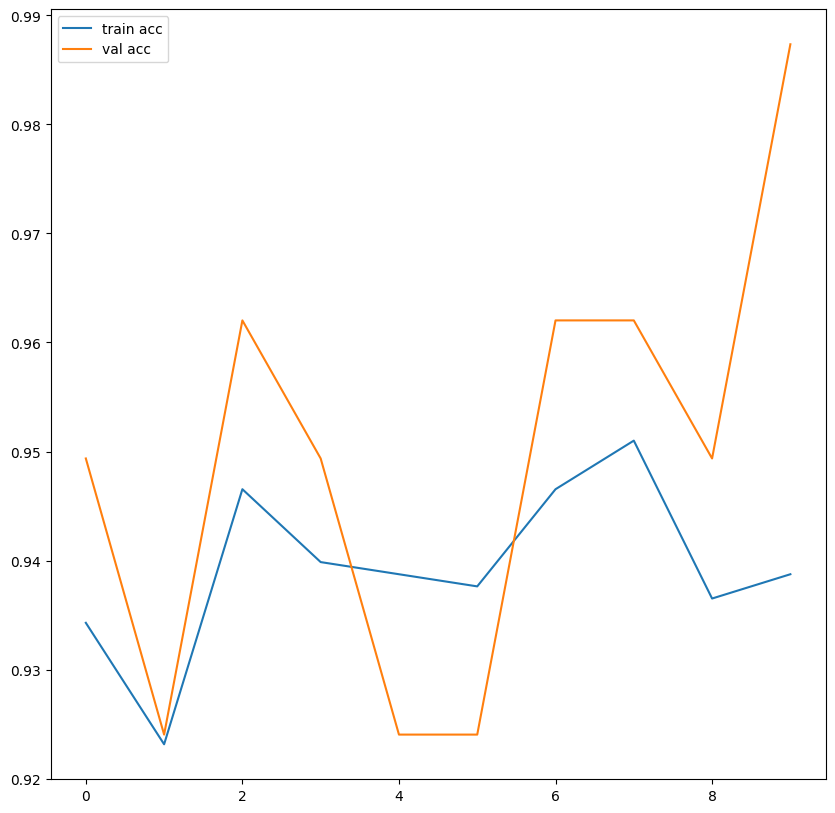

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

plt.figure(figsize=(10,10))
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

First image to predict
actual label:  FU
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 704ms/step
predicted label:  FU


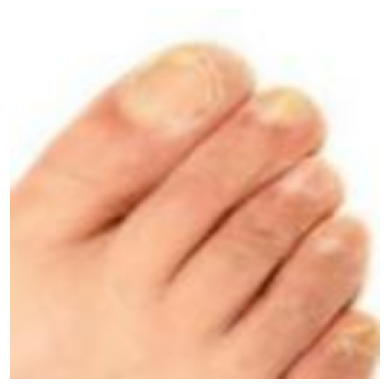

In [ ]:
import numpy as np

for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("First image to predict")
    plt.imshow(first_image)
    print("actual label: ",class_names [first_label])


    batch_prediction = model.predict(images_batch)
    print("predicted label: ", class_names[np.argmax(batch_prediction[0])])
    plt.axis("off")

In [ ]:
def predict (model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims (img_array, 0)
    predictions = model.predict(img_array)
    predicted_class = class_names [np.argmax (predictions[0])]
    confidence = round(100* (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


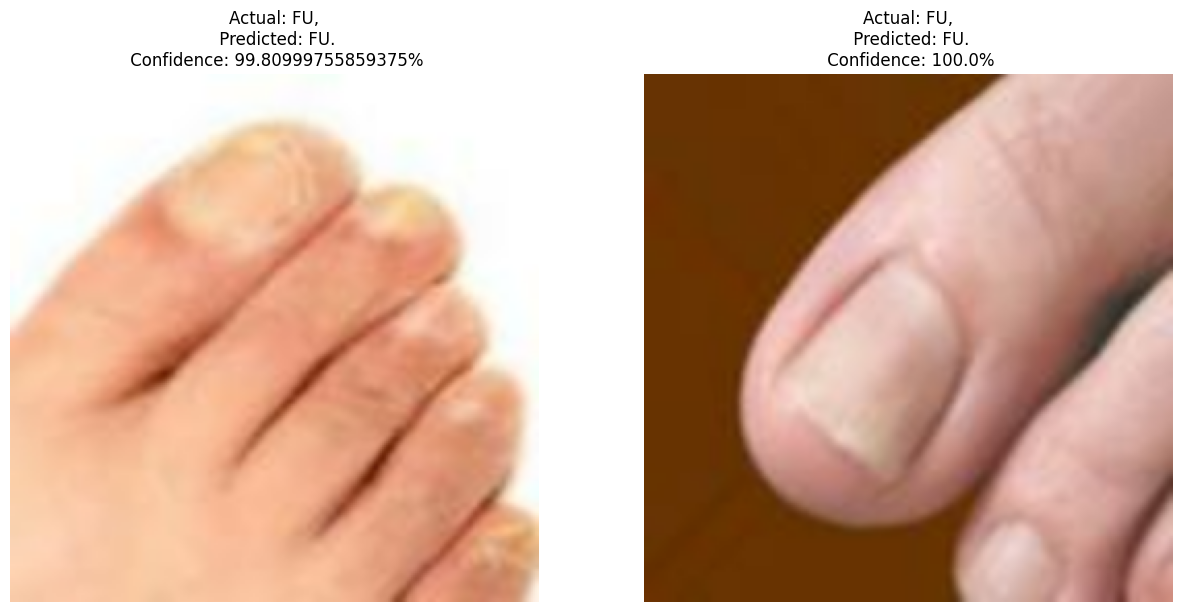

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):

  for i in range(2):

    ax = plt.subplot(1, 2, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))

    predicted_class, confidence = predict (model, images[i].numpy())
    actual_class = class_names[labels[i]]
    plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
    plt.axis("off")

In [ ]:
# Confusion Matrix and Classification Report
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Generate predictions using the model
Y_pred = model.predict(val_ds)

# Get the predicted labels by taking the index of the maximum value along the second axis
y_pred = np.argmax(Y_pred, axis=1)

# Print Confusion Matrix
print('Confusion Matrix')
cm = confusion_matrix(val_labels, y_pred)
print(cm)

# Print Classification Report
print('Classification Report')
target_names = ['BA',

 'FU',
 'PA',
 'VI'
 ]
print(classification_report(val_labels, y_pred, target_names=target_names))


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Confusion Matrix
[[22  0  0  0]
 [ 0 28  0  0]
 [ 1  0 10  0]
 [ 0  0  0 18]]
Classification Report
              precision    recall  f1-score   support

          BA       0.96      1.00      0.98        22
          FU       1.00      1.00      1.00        28
          PA       1.00      0.91      0.95        11
          VI       1.00      1.00      1.00        18

    accuracy                           0.99        79
   macro avg       0.99      0.98      0.98        79
weighted avg       0.99      0.99      0.99        79



1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Confusion Matrix
[[22  0  0  0]
 [ 0 28  0  0]
 [ 1  0 10  0]
 [ 0  0  0 18]]


<Figure size 800x600 with 0 Axes>

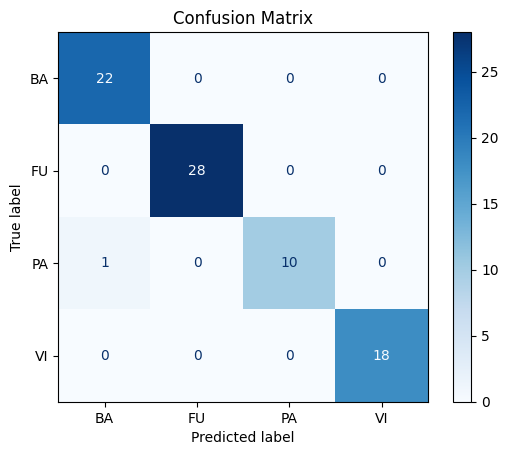

Classification Report
              precision    recall  f1-score   support

          BA       0.96      1.00      0.98        22
          FU       1.00      1.00      1.00        28
          PA       1.00      0.91      0.95        11
          VI       1.00      1.00      1.00        18

    accuracy                           0.99        79
   macro avg       0.99      0.98      0.98        79
weighted avg       0.99      0.99      0.99        79



In [ ]:
# Confusion Matrix and Classification Report
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate predictions using the model
Y_pred = model.predict(val_ds)

# Get the predicted labels by taking the index of the maximum value along the second axis
y_pred = np.argmax(Y_pred, axis=1)

# Print Confusion Matrix
print('Confusion Matrix')
cm = confusion_matrix(val_labels, y_pred)
print(cm)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Print Classification Report
print('Classification Report')
target_names = ['BA',

 'FU',
 'PA',
 'VI'
 ]
print(classification_report(val_labels, y_pred, target_names=target_names))
